In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
farming_dataset = pd.read_csv('./dataset/farming_dataset.csv')

In [4]:
farming_dataset.head()

,Farm ID,Farm Size (Acres),Crop Type,Annual Yield (Tons),Soil pH,Rainfall (mm/year),Temperature (°C),Fertilizer Usage (kg/acre)
0,1,190.40,Rice,99.22,7.32,1236.97,30.74,328.23
1,2,475.60,Corn,85.29,6.39,1044.90,27.73,401.66
2,3,367.34,Rice,21.64,5.91,1726.61,12.64,366.47
3,4,301.34,Rice,93.13,7.45,573.16,30.97,425.51
4,5,82.23,Wheat,12.52,7.72,342.45,26.78,75.30


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
farming_dataset['Crop Type'] = le.fit_transform(farming_dataset['Crop Type'])

In [7]:
farming_dataset

,Farm ID,Farm Size (Acres),Crop Type,Annual Yield (Tons),Soil pH,Rainfall (mm/year),Temperature (°C),Fertilizer Usage (kg/acre)
0,1,190.40,1,99.22,7.32,1236.97,30.74,328.23
1,2,475.60,0,85.29,6.39,1044.90,27.73,401.66
2,3,367.34,1,21.64,5.91,1726.61,12.64,366.47
3,4,301.34,1,93.13,7.45,573.16,30.97,425.51
4,5,82.23,2,12.52,7.72,342.45,26.78,75.30
...,...,...,...,...,...,...,...,...
995,996,50.33,0,66.08,8.23,1524.65,25.71,183.28
996,997,459.07,1,47.76,7.03,1168.89,14.60,307.53
997,998,72.73,0,88.14,7.00,1327.33,12.64,248.83
998,999,475.37,1,22.36,5.65,1083.53,30.32,206.02


In [8]:
# Extract features for clustering
dataset = farming_dataset.drop(columns=['Farm ID'], axis= True)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

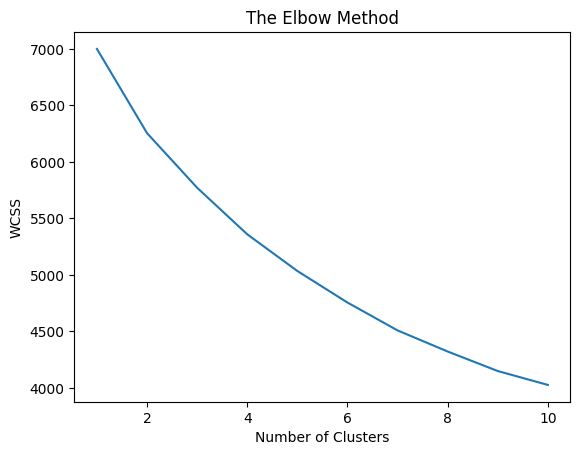

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters= 3, n_init= 'auto', random_state = 42)
y_pred = kmeans.fit_predict(dataset)

In [14]:
print(y_pred)

[0 2 1 0 0 0 1 0 2 2 2 0 1 0 1 0 1 2 1 2 1 2 2 2 0 0 1 2 1 1 0 0 1 1 2 0 2
 2 0 1 1 1 1 1 1 1 0 1 2 1 1 2 0 0 2 0 0 1 1 1 2 1 0 0 0 2 2 2 0 0 1 2 1 1
 0 1 1 2 2 1 0 2 1 1 2 1 1 1 1 1 0 0 2 0 1 0 1 1 1 2 1 0 0 2 0 1 2 2 2 2 2
 1 2 2 1 2 1 2 0 2 2 2 0 1 0 2 2 0 1 2 1 1 2 1 1 1 2 2 0 1 0 2 2 1 1 0 2 0
 1 1 0 0 0 1 1 1 1 1 2 2 0 2 0 2 2 1 0 0 1 2 2 2 1 1 2 1 0 0 0 2 2 1 0 1 0
 2 0 2 2 2 2 1 2 0 0 0 2 0 2 2 2 2 1 1 1 0 2 1 2 2 2 0 0 1 1 0 2 2 1 2 1 0
 1 1 2 0 1 2 2 1 1 2 2 1 1 0 2 1 2 1 0 1 0 1 0 1 0 2 2 2 1 0 2 2 1 1 0 1 0
 1 2 0 2 2 0 1 2 2 0 2 0 2 0 0 0 1 1 1 0 2 0 0 0 1 0 0 0 1 2 0 2 2 2 0 2 0
 1 1 2 0 0 2 0 0 0 1 1 0 0 0 1 2 2 1 2 2 1 2 1 0 1 1 0 1 0 0 0 0 2 0 2 0 2
 1 1 0 1 1 2 0 0 2 0 0 1 0 1 1 2 0 2 1 2 2 1 0 2 2 0 1 0 1 2 2 1 2 1 0 0 2
 2 1 1 0 1 0 2 0 2 1 2 0 1 2 1 1 1 0 1 2 2 0 1 2 1 1 0 0 2 2 1 2 1 1 0 2 2
 0 1 2 0 2 0 1 2 2 1 1 0 2 2 0 1 2 2 2 2 2 0 2 2 2 0 2 2 1 2 0 1 2 2 1 2 2
 1 0 1 1 0 0 2 0 1 1 1 2 2 0 2 1 0 1 2 1 2 0 0 1 2 2 0 2 1 2 1 0 2 2 0 1 1
 0 0 0 0 2 0 1 0 0 0 0 1 